# Práctico 1: Reglas de Asociación
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

1. Obtener reglas de asociación entre películas en el dataset movielens, al estilo de: https://rpubs.com/vitidN/203264 pero usando la notebook de reglas de asociación de Valeria.
2. Aplicar diferentes métricas para ordenamiento de las reglas.
3. Hacer un pequeño informe (entre 200 y 500 palabras, puede ser más pero no mucho más) de interpretación de los efectos de las métricas aplicadas.

In [1]:
#
import pandas as pd
import numpy as np

import os
print(os.listdir('C:/Users/Flavio/Downloads/ml-20m'))

['genome-scores.csv', 'genome-tags.csv', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [2]:
#leemos genome-scores (de curiosos nomás)...

genome_scores = pd.read_csv('C:/Users/Flavio/Downloads/ml-20m/genome-scores.csv')
genome_scores.head()


,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [3]:
#leemos genome-tags (de curiosos nomás)...

genome_tags = pd.read_csv('C:/Users/Flavio/Downloads/ml-20m/genome-tags.csv')
genome_tags.head()


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [4]:
#leemos links (de curiosos nomás)...

links = pd.read_csv('C:/Users/Flavio/Downloads/ml-20m/links.csv')
links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
#leemos movies...

movies = pd.read_csv('C:/Users/Flavio/Downloads/ml-20m/movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#leemos ratings...
#... convertimos campo fecha para filtrar datos.

ratings = pd.read_csv('C:/Users/Flavio/Downloads/ml-20m/ratings.csv')
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit = 's')
ratings.head()


,userId,movieId,rating,timestamp,date
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


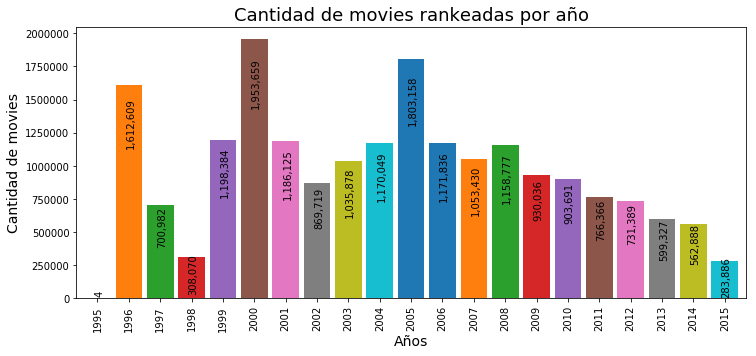

In [9]:
#cantidad de registros por año...
import matplotlib.pyplot as plt

ratings_anual = ratings.date.dt.year.value_counts(sort = False)

ratings_anual.plot.bar(figsize = (12, 5), width = .85)
plt.title('Cantidad de movies rankeadas por año', fontsize = 18)
plt.ylabel('Cantidad de movies', fontsize = 14)
plt.xlabel('Años', fontsize = 14)

for i, bucle in enumerate(np.arange(-0.1, 20, 1)):
    plt.text(bucle, (ratings_anual.iloc[i] * .9), '{:,}'.format(ratings_anual.iloc[i]), size = 10, rotation = 90)

plt.show()


In [8]:
#observamos cantidad de puntuaciones por calificación y año...

ratings.groupby([ratings.date.dt.year, 'rating']).count().drop(['movieId', 'timestamp', 'date'], axis = 1).rename(columns={'userId':'cantidad'})


cantidad
date rating          
1995 3.0            2
     4.0            1
     5.0            1
1996 1.0        61881
     2.0        98127
     3.0       664603
     4.0       474577
     5.0       313421
1997 1.0        26358
     2.0        44460
     3.0       267609
     4.0       215391
     5.0       147164
1998 1.0        19639
     2.0        35350
     3.0        85460
     4.0       102733
     5.0        64888
1999 1.0        65470
     2.0       125036
     3.0       300696
     4.0       419780
     5.0       287402
2000 1.0       113001
     2.0       210638
     3.0       508716
     4.0       680427
     5.0       440877
2001 1.0        70005
     2.0       134368
...               ...
2013 0.5         9572
     1.0        10373
     1.5        10359
     2.0        25479
     2.5        35645
     3.0        84227
     3.5       107890
     4.0       151554
     4.5        88026
     5.0        76202
2014 0.5        11531
     1.0        10639
     1.5        10396
     2.0        25703
     2.5        35307
     3.0        79818
     3.5        99137
     4.0       140106
     4.5        78094
     5.0        72157
2015 0.5         7975
     1.0         6969
     1.5         6073
     2.0        14897
     2.5        19348
     3.0        44424
     3.5        49707
     4.0        68427
     4.5        31930
     5.0        34136

[168 rows x 1 columns]

In [10]:
#por limitación en el recurso optamos por enfocarnos en el año 2015...
#... y jugar con las mejores puntuaciones: 4.5 y 5.

ratings_2015 = ratings[(ratings.date.dt.year == 2015) & (ratings.rating >= 4.5)]
ratings_2015


,userId,movieId,rating,timestamp,date
3535,31,110,5.0,1424733473,2015-02-23 23:17:53
3536,31,260,5.0,1424733433,2015-02-23 23:17:13
3542,31,1196,5.0,1424733435,2015-02-23 23:17:15
3545,31,1210,5.0,1424733439,2015-02-23 23:17:19
3549,31,2571,4.5,1424736532,2015-02-24 00:08:52
3551,31,3300,5.0,1424733940,2015-02-23 23:25:40
3556,31,3671,5.0,1424733819,2015-02-23 23:23:39
3558,31,3793,4.5,1424734262,2015-02-23 23:31:02
3559,31,3916,4.5,1424734610,2015-02-23 23:36:50
3566,31,4366,4.5,1424734190,2015-02-23 23:29:50


In [11]:
print('Cantidad de Usuarios Únicos: {0}'.format(len(ratings_2015.userId.unique())))

Cantidad de Usuarios Únicos: 3350


In [12]:
#leemos tags (de curiosos nomás)...

tags = pd.read_csv('C:/Users/Flavio/Downloads/ml-20m/tags.csv')
tags.head()


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### veamos que sale...

In [13]:
#generamos tabla mapeando títulos...

ratings_2015_con_title = pd.merge(ratings_2015[['userId','movieId']], movies[['movieId', 'title']], on = 'movieId', how = 'inner').sort_values(by = 'userId')
ratings_2015_con_title


,userId,movieId,title
0,31,110,Braveheart (1995)
3100,31,7153,"Lord of the Rings: The Return of the King, The..."
3582,31,7317,EuroTrip (2004)
3590,31,7373,Hellboy (2004)
3607,31,8368,Harry Potter and the Prisoner of Azkaban (2004)
3714,31,8371,"Chronicles of Riddick, The (2004)"
3731,31,8972,National Treasure (2004)
3761,31,8985,Blade: Trinity (2004)
3766,31,33493,Star Wars: Episode III - Revenge of the Sith (...
3806,31,33794,Batman Begins (2005)


In [14]:
#preparamos itemset por usuario...

ratings_2015_trx = ratings_2015_con_title.values[:, [0,2]]
print(ratings_2015_trx)


[[31 'Braveheart (1995)']
 [31 'Lord of the Rings: The Return of the King, The (2003)']
 [31 'EuroTrip (2004)']
 ...
 [138406 'Killing Fields, The (1984)']
 [138414 'Birdman (2014)']
 [138414 '28 Days Later (2002)']]


In [15]:
#construimos transacciones...
from itertools import groupby

trx = []

for userId, title in groupby(ratings_2015_trx, lambda x: x[0]):
    trx.append([item[1] for item in title])
    
print(trx)


[['Braveheart (1995)', 'Lord of the Rings: The Return of the King, The (2003)', 'EuroTrip (2004)', 'Hellboy (2004)', 'Harry Potter and the Prisoner of Azkaban (2004)', 'Chronicles of Riddick, The (2004)', 'National Treasure (2004)', 'Blade: Trinity (2004)', 'Star Wars: Episode III - Revenge of the Sith (2005)', 'Batman Begins (2005)', 'Transporter 2 (2005)', 'Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)', 'Underworld: Evolution (2006)', 'V for Vendetta (2006)', 'Over the Hedge (2006)', 'X-Men: The Last Stand (2006)', "Pirates of the Caribbean: Dead Man's Chest (2006)", 'Epic Movie (2007)', '300 (2007)', "Pirates of the Caribbean: At World's End (2007)", 'Transformers (2007)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Brother Bear (2003)', 'Stardust (2007)', 'Underworld (2003)', 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Matrix, The (1999)', 'Pitch Black (2000)', 'Blazin

In [16]:
#
from efficient_apriori import apriori

min_soporte = 0.03
min_confianza = 0.7
  
itemsets, rules = apriori(trx, min_support = min_soporte,  min_confidence = min_confianza)


In [17]:
#

rules = sorted(rules, reverse = True, key = lambda rule: rule.confidence)

for rule in rules:
  print(rule)


{Lord of the Rings: The Two Towers, The (2002), Star Wars: Episode V - The Empire Strikes Back (1980)} -> {Lord of the Rings: The Return of the King, The (2003)} (conf: 0.954, supp: 0.031, lift: 6.631, conv: 18.663)
{Lord of the Rings: The Fellowship of the Ring, The (2001), Lord of the Rings: The Two Towers, The (2002), Star Wars: Episode IV - A New Hope (1977)} -> {Lord of the Rings: The Return of the King, The (2003)} (conf: 0.953, supp: 0.030, lift: 6.625, conv: 18.321)
{Dark Knight, The (2008), Lord of the Rings: The Fellowship of the Ring, The (2001), Lord of the Rings: The Two Towers, The (2002)} -> {Lord of the Rings: The Return of the King, The (2003)} (conf: 0.953, supp: 0.048, lift: 6.623, conv: 18.193)
{Lord of the Rings: The Fellowship of the Ring, The (2001), Lord of the Rings: The Two Towers, The (2002), Matrix, The (1999)} -> {Lord of the Rings: The Return of the King, The (2003)} (conf: 0.951, supp: 0.052, lift: 6.607, conv: 17.313)
{Inception (2010), Lord of the Rings

### Algunas consideraciones...
El dataset describe la actividad de Movielens desde el año 1995 al 2015 y su sistema de recomendación: un registro que supera los 20 millones de calificaciones (ratings) de casi 140.000 usuarios sobre 27.278 films utilizando “estrellas” para evaluarlas entre el 1 y 5.<br><br>
Para el experimento utilicé dos de las tablas (ratings.csv y movies.csv) y estuve obligado a ajustarme a algunas condiciones debido a mi limitación de recursos (poco poder de cálculo para llevar adelante el algoritmo sobre tantos registros): me enfoqué solo en las películas del año 2015 que alcanzan las mejores calificaciones de 4 y 5.<br><br>
Corrí Apriori configurando un soporte mínimo = 0.03 y confianza mínima = 0.7 destacando las películas de género fantástico como la zaga de “El señor de los Anillos”, “La guerra de las Galaxias” y “Batman, caballero de la noche” se combinan entre si con niveles de confianza muy altos (95%).<br><br>
